In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import kagglehub
import os


**Objective:**
Analyze the relationship between years of experience and salary, and build a predictive model using linear regression.

**Data:**

* Dataset of salaries with corresponding years of experience.
* Cleaned data by removing unnecessary index column (`Unnamed: 0`).
* Created experience groups for better visualization (`1-2`, `3-4`, `5-6`, `7-8`, `9+` years).

**Exploratory Data Analysis:**

* Scatter plot of Salary vs YearsExperience colored by experience groups.
* Observed: Higher experience generally corresponds to higher salary.

**Modeling:**

* Split data into training and test sets (80/20).
* Fitted a simple linear regression model.
* Evaluated model using R² and Mean Squared Error (MSE) for both train and test sets.

**Diagnostics:**

* Plotted regression line, residuals vs predicted, test set predictions, and actual vs predicted.
* Residuals show slight heteroscedasticity, but overall fit is good.

**Tools:**

* Python libraries: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`.


In [92]:
# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\valer\.cache\kagglehub\datasets\abhishek14398\salary-dataset-simple-linear-regression\versions\1


In [93]:
import os
dataset_path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_path = os.path.join(dataset_path, filename)
        break
df = pd.read_csv(csv_path)

In [94]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


NO need Unnamed: 0, just dublication of index col

In [95]:
df = df.drop(['Unnamed: 0'], axis=1)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [97]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [98]:
df.notnull()

,YearsExperience,Salary
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [99]:
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [100]:
df.duplicated().sum()

np.int64(0)

In [101]:
bins = [0, 2, 4, 6, 8, float('inf')]
labels = ['1-2', '3-4', '5-6', '7-8', '9+']

df['ExperienceGroup'] = pd.cut(df['YearsExperience'], bins=bins, labels=labels, right=True)


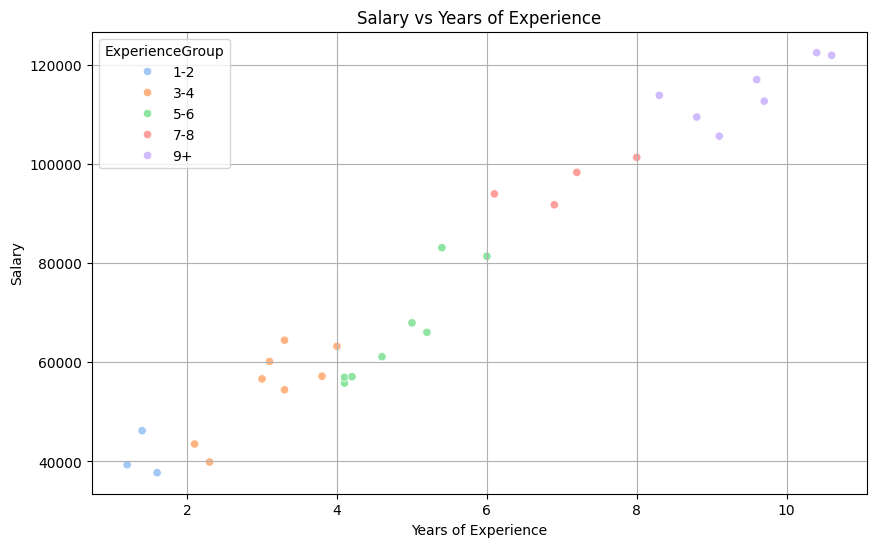

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsExperience', y='Salary', hue='ExperienceGroup', data=df, palette='pastel', legend='brief'
)
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

This plot visualizes individual salary data points against years of experience. Each point represents a single observation in the dataset. To make patterns more interpretable, the YearsExperience variable is grouped into five experience ranges (1–2, 3–4, 5–6, 7–8, 9+ years), and each group is colored differently.

Higher exp - higher salary

<Axes: xlabel='YearsExperience', ylabel='Salary'>

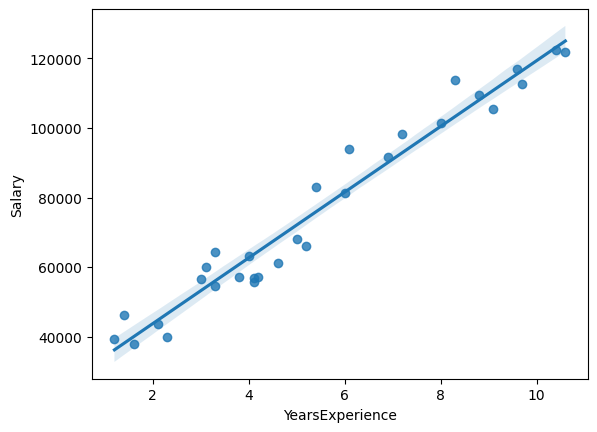

In [103]:
sns.regplot(x="YearsExperience", y= "Salary", data = df)

This plot shows the relationship between YearsExperience and Salary with a fitted regression line. Each point represents an individual observation, and the line indicates the general trend in the data.

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [105]:
x = df['YearsExperience'].values.reshape(-1, 1)
y = df['Salary']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
model = LinearRegression()
model.fit(x_train,y_train)
print("Intercept (b0):", model.intercept_)
print("Coefficient (b1):", model.coef_[0])

Intercept (b0): 24380.20147947369
Coefficient (b1): 9423.81532303098


In [108]:
r2 = model.score(x_train, y_train)
print("R² Score:", r2)
print("Вільний зсув: ", model.intercept_)
print("Коефіцієнт при зміні: ", model.coef_)

R² Score: 0.9645401573418148
Вільний зсув:  24380.20147947369
Коефіцієнт при зміні:  [9423.81532303]


In [109]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [110]:
print(y_train_pred)

[122387.880839   107309.77632215  63017.8443039   35688.77986711
  46054.97672244  73384.04115923  52651.64744857  63960.2258362
  63017.8443039   99770.72406372  37573.54293172  39458.30599632
 110136.92091906  44170.21365784  92231.6718053  114848.82858057
  80923.09341766 124272.6439036   89404.52720839  55478.79204548
  62075.4627716   67729.75196542  81865.47494996  53594.02898087]


In [111]:
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Train R²: {r2_train:.3f}, MSE: {mse_train:.2f}")
print(f"Test R²: {r2_test:.3f}, MSE: {mse_test:.2f}")

Train R²: 0.965, MSE: 27102249.73
Test R²: 0.902, MSE: 49830096.86


R² measures how well the model explains the variance in salary (closer to 1 = better).

MSE measures average squared error; lower is better.

In [112]:
print(y_train.shape)
print(y_train_pred.shape)
y_train_pred = y_train_pred.ravel()
print(y_train_pred.shape)


(24,)
(24,)
(24,)


In [113]:
train_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_train_pred,
    'Residuals': y_train - y_train_pred
})

print("Training DataFrame:\n", train_df.head())

Training DataFrame:
       Actual      Predicted    Residuals
28  122392.0  122387.880839     4.119161
24  109432.0  107309.776322  2122.223678
12   56958.0   63017.844304 -6059.844304
0    39344.0   35688.779867  3655.220133
4    39892.0   46054.976722 -6162.976722


In [114]:
test_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Residuals': y_test - y_test_pred
})

print("Test DataFrame:\n", test_df.head())


Test DataFrame:
       Actual      Predicted     Residuals
27  112636.0  115791.210113  -3155.210113
15   67939.0   71499.278095  -3560.278095
23  113813.0  102597.868661  11215.131339
17   83089.0   75268.804224   7820.195776
8    64446.0   55478.792045   8967.207955


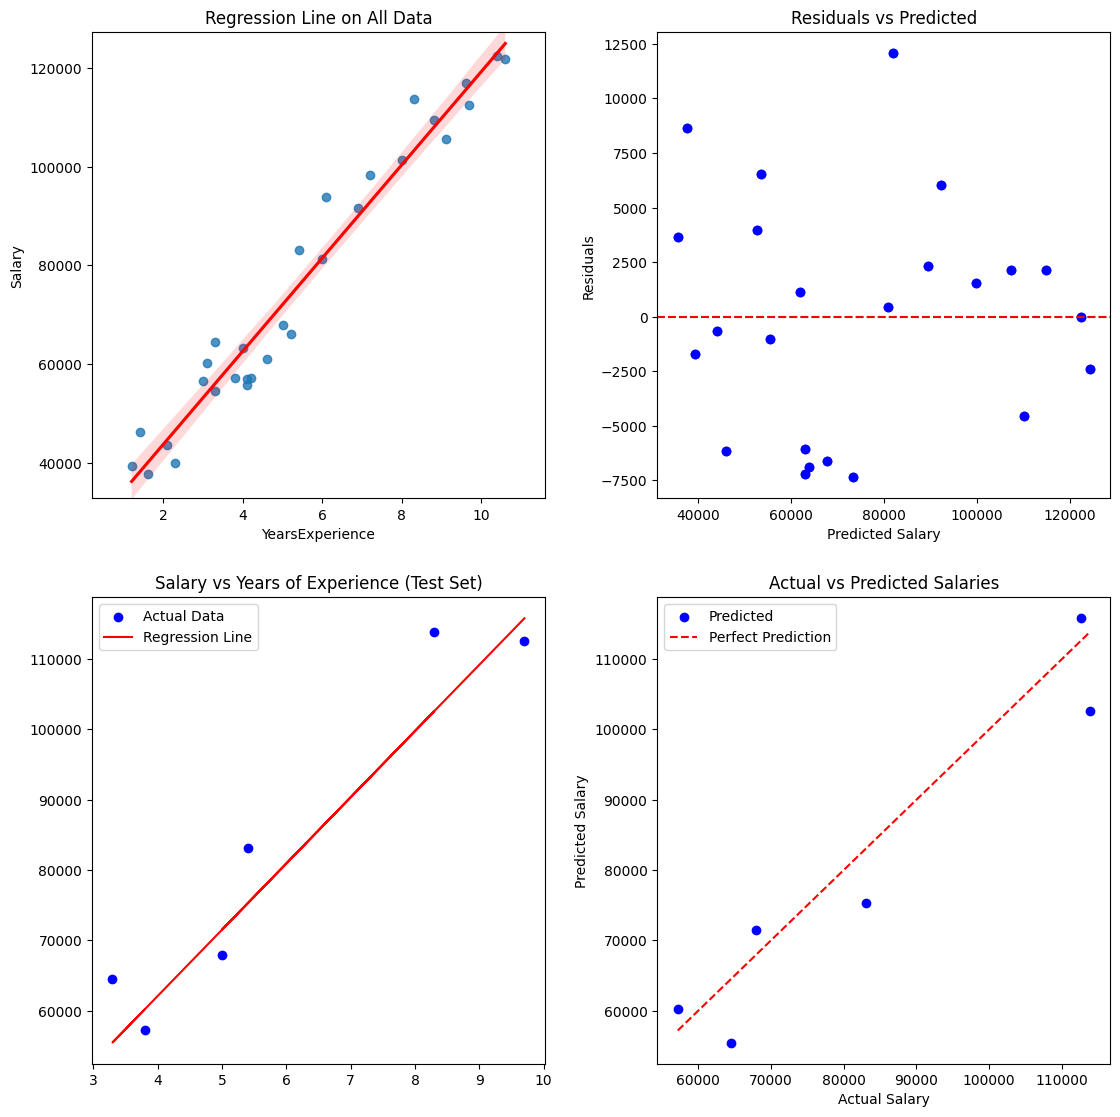

In [118]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.tight_layout(pad=5.0)

# 1. Regression line on all data
sns.regplot(x="YearsExperience", y="Salary", data=df, ax=axes[0, 0], line_kws={'color':'red'})
axes[0, 0].set_title('Regression Line on All Data')
axes[0, 0].set_xlim(df['YearsExperience'].min() - 1, df['YearsExperience'].max() + 1)
axes[0, 0].set_ylim(df['Salary'].min() - 5000, df['Salary'].max() + 5000)


# 2. Residuals vs Predicted
sns.residplot(x=y_train_pred, y=y_train - y_train_pred, color="blue", ax=axes[0, 1])
axes[0, 1].scatter(y_train_pred, y_train - y_train_pred, color='blue')
axes[0, 1].axhline(0, color='red', linestyle='--')
axes[0, 1].set_xlabel("Predicted Salary")
axes[0, 1].set_ylabel("Residuals")
axes[0, 1].set_title("Residuals vs Predicted")


# 3. Test data: Actual vs Predicted line
axes[1, 0].scatter(x_test, y_test, color='blue', label='Actual Data')
axes[1, 0].plot(x_test, y_test_pred, color='red', label='Regression Line')
axes[1, 0].set_title('Salary vs Years of Experience (Test Set)')
axes[1, 0].legend()

# 4. Actual vs Predicted values
axes[1, 1].scatter(y_test, y_test_pred, color='blue', label='Predicted')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
axes[1, 1].set_title('Actual vs Predicted Salaries')
axes[1, 1].set_xlabel('Actual Salary')
axes[1, 1].set_ylabel('Predicted Salary')
axes[1, 1].legend()

plt.show()


Regression Line on All Data (top-left)
The red regression line fits the data well.

Residuals vs Predicted (top-right)
The residuals are not evenly distributed — there is a pattern: residuals seem bigger for mid-range predictions. This might indicate slight heteroscedasticity (variance of errors changes with predicted values).
Normally, residuals should be randomly scattered around 0 without a clear pattern.

Salary vs Years of Experience (Test Set) (bottom-left)
The scale is a bit tight, which makes the line look almost diagonal. Could expand axis limits slightly for clarity.

Actual vs Predicted Salaries (bottom-right)
Few points are slightly off the line, which is normal.
With small datasets, some deviations are expected.